In [81]:
import pandas as pd
import numpy as np
import openpyxl as px

In [82]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [83]:
df = pd.read_excel("Baseline_Brazil_a.xlsx", sheet_name="Plan1")
df = df.drop(columns=['pregnant', 'job', 'curso', 'geral_id', 
                      'year_entered', 'bmi_class',
                      'score_food_smile', 'score_subs_smile', 'score_PA_smile', 
                      'score_stress_smile', 'score_sleep_smile', 'score_social_smile', 
                      'score_envir_smile', 'scoretot_smile'])

courses = pd.read_excel("Untitled 1.ods", engine='odf')
df = pd.concat([df, courses], axis=1)

drop = [1, 2, 3]
df = df[~df['student_of'].isin(drop)]
df = df.drop(columns=['student_of'])

print(f"{df.shape[0]} rows, {df.shape[1]} columns")

# detecting numerical and categorical vars
# heuristic: max size for cat vars is 15
CATEGORICAL_MAX_UNIQUE = 6

def is_integer_valued(series):
    non_null = series.dropna()
    if len(non_null) == 0:
        return False
    return np.issubdtype(non_null.dtype, np.floating) and (non_null == non_null.round()).all()

categorical_cols = []
numerical_cols   = []

for col in df.columns:
    s = df[col]
    if is_integer_valued(s) and s.nunique() <= CATEGORICAL_MAX_UNIQUE:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

df['gad7_class'] = df['gad7_class'] + 1

print("Categorical columns:", categorical_cols)
print("Numerical columns  :", numerical_cols)

df.head()


6398 rows, 41 columns
Categorical columns: ['sex', 'gender_identity', 'sexual_orientation', 'ethnic_group', 'marital_status', 'student_accommodation', 'work', 'smile_2', 'smile_3', 'smile_5', 'smile_8', 'smile_9', 'smile_10', 'smile_11', 'smile_12', 'smile_13', 'smile_15', 'smile_17', 'smile_19', 'smile_25', 'smile_27', 'smile_28', 'smile_30', 'smile_31', 'smile_32', 'smile_34', 'smile_37', 'smile_40', 'smile_41', 'smile_42', 'smile_43', 'sedentary_behavior', 'sedentary_2', 'gad7_class']
Numerical columns  : ['age', 'bmi', 'income', 'university', 'year', 'gad7_score', 'course']


,age,sex,gender_identity,sexual_orientation,ethnic_group,bmi,marital_status,student_accommodation,work,income,university,year,smile_2,smile_3,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43,sedentary_behavior,sedentary_2,gad7_score,gad7_class,course
106,21.0,0.0,0.0,0.0,0.0,19.705532,1.0,1.0,1.0,17000.0,1,1,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,3
107,18.0,0.0,2.0,2.0,0.0,20.700817,1.0,1.0,1.0,6500.0,1,1,0.0,2.0,2.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,1.0,11.0,1.0,7
108,19.0,0.0,0.0,2.0,0.0,28.040379,1.0,1.0,0.0,7000.0,1,1,0.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,3.0,0.0,0.0,20.0,1.0,6
109,18.0,0.0,0.0,2.0,0.0,22.959087,1.0,1.0,1.0,25000.0,1,1,0.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,0.0,3.0,3.0,0.0,2.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,3.0,3.0,0.0,3.0,0.0,2
110,19.0,1.0,0.0,0.0,0.0,20.987654,1.0,1.0,0.0,120.0,1,1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,2


In [84]:

# ── Regional grouping by university code ──────────────────────────────────────
# Codes 0–4 (alphabetical): 0=center-west, 1=north, 2=northeast, 3=south, 4=southeast
REGION_NAMES = ['center-west', 'north', 'northeast', 'south', 'southeast']

region_map = {
    1: 4, 12: 4, 13: 4,                   # southeast
    2: 2,  4: 2,  5: 2, 6: 2, 7: 2, 8: 2, # northeast
    3: 1,                                   # north
    11: 0,                                  # center-west
    9: 3, 10: 3,                            # south
}

df['region'] = df['university'].map(region_map).astype(int)

# Store original-df indexes per region code (used in cell 8 for per-region evaluation)
region_indexes = {
    code: df.index[df['region'] == code].tolist()
    for code in range(len(REGION_NAMES))
}

# Sanity check
print("Participants per region:")
for code, name in enumerate(REGION_NAMES):
    print(f"  {code} = {name}: {len(region_indexes[code])}")

print("\nUniversity → region code:")
print(
    df.groupby('university')['region']
    .first()
    .reset_index()
    .sort_values('university')
    .to_string(index=False)
)


Participants per region:
  0 = center-west: 347
  1 = north: 267
  2 = northeast: 3189
  3 = south: 1040
  4 = southeast: 1555

University → region code:
 university  region
          1       4
          2       2
          3       1
          4       2
          5       2
          6       2
          7       2
          8       2
          9       3
         10       3
         11       0
         12       4
         13       4


In [85]:
X = df.drop(columns=['gad7_class', 'gad7_score', 'university'])
y = df["gad7_class"]

valid_mask = y.notna()
X = X.loc[valid_mask]
y = y.loc[valid_mask]

if y.isna().any():
    raise ValueError("y contains NaN values after filtering.")

data_idx = X.index.to_numpy()

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline

shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=50)
splits = []

one_hotted = ['sex', 'gender_identity', 'sexual_orientation', 'ethnic_group', 
               'marital_status', 'student_accommodation', 'work', 'course',]  

num = ['age', 'bmi', 'income', 'sedentary_behavior', 'sedentary_2', 'smile_2','smile_3', 'year',
       'smile_5', 'smile_8', 'smile_9', 'smile_10', 'smile_11', 'smile_12', 'smile_13', 'smile_15', 
       'smile_17', 'smile_19', 'smile_25', 'smile_27', 'smile_28', 'smile_30', 'smile_31', 'smile_32', 
       'smile_34', 'smile_37', 'smile_40', 'smile_41', 'smile_42', 'smile_43']

# Pipeline for categorical: impute first, then one-hot encode
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Pipeline for numerical: impute first, then scale
numerical_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=1)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, one_hotted),
        ("num", numerical_pipeline, num),
    ],
    remainder="passthrough"
)

for train_pos, test_pos in shuffle_split.split(data_idx):
    train_idx = data_idx[train_pos]
    test_idx = data_idx[test_pos]

    X_train, X_test_og = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test_og)
    
    # Get feature names from the preprocessor
    onehot_encoder = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    onehot_names = onehot_encoder.get_feature_names_out(one_hotted)
    scaled_names = num
    remaining = [col for col in X_train.columns if col not in one_hotted + num]

    all_feature_names = np.concatenate([onehot_names, scaled_names, remaining])

    X_train_imputed = pd.DataFrame(X_train_transformed, index=X_train.index, columns=all_feature_names)
    X_test_imputed = pd.DataFrame(X_test_transformed, index=X_test_og.index, columns=all_feature_names)

    splits.append({
        "X_train": X_train_imputed,
        "X_test": X_test_imputed,
        "y_train": y_train,
        "y_test": y_test
    })
    
print(f"Treino: {splits[0]['X_train'].shape}, Teste: {splits[0]['X_test'].shape}")

Treino: (4567, 65), Teste: (1142, 65)


In [87]:
splits[0]['X_train'].head()

,sex_0.0,sex_1.0,gender_identity_0.0,gender_identity_1.0,gender_identity_2.0,sexual_orientation_0.0,sexual_orientation_1.0,sexual_orientation_2.0,sexual_orientation_3.0,sexual_orientation_4.0,ethnic_group_0.0,ethnic_group_1.0,ethnic_group_2.0,ethnic_group_3.0,ethnic_group_4.0,ethnic_group_5.0,marital_status_0.0,marital_status_1.0,marital_status_2.0,marital_status_3.0,marital_status_4.0,student_accommodation_0.0,student_accommodation_1.0,work_0.0,work_1.0,course_0.0,course_1.0,course_2.0,course_3.0,course_4.0,course_5.0,course_6.0,course_7.0,course_8.0,age,bmi,income,sedentary_behavior,sedentary_2,smile_2,smile_3,year,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43,region
3204,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.602952,-0.381593,-0.024858,-0.17714,-0.962839,-0.875906,0.46354,-0.987164,-0.113892,-0.558568,0.365742,0.339372,0.12426,1.376462,2.418832,0.947425,-0.740452,1.433756,-0.733886,-0.288485,0.895399,0.846409,0.185624,1.021572,1.149188,0.952433,-0.964107,-0.647801,-0.485947,-0.749814,2.0
6499,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.291379,-0.200813,-0.027323,-0.17714,-0.038068,0.208764,0.46354,1.013003,-0.113892,0.760450,0.365742,0.339372,0.12426,-0.515293,-0.711461,-1.820308,0.306821,-1.095066,1.660155,-1.459605,0.895399,-0.542079,-0.928363,1.021572,0.108882,0.952433,0.128468,0.846394,0.736146,-0.749814,4.0
3548,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.602952,-0.554794,-0.027631,-0.17714,-0.038068,0.208764,0.46354,-0.987164,1.196299,0.760450,0.365742,0.339372,0.12426,0.430585,0.331970,0.947425,1.354094,-0.252125,0.463134,-0.288485,0.895399,0.846409,0.185624,1.021572,0.108882,-0.310931,0.128468,0.846394,-0.485947,1.203081,2.0
5838,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.602952,-0.377804,-0.020235,-0.17714,-0.962839,0.208764,0.46354,-0.987164,1.196299,0.760450,0.365742,0.339372,0.12426,1.376462,2.418832,0.947425,-0.740452,1.433756,-0.733886,-0.288485,0.895399,-0.542079,1.299611,1.021572,0.108882,0.952433,0.128468,2.340589,1.958239,1.203081,3.0
6530,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.291379,-1.213085,-0.027940,0.81794,0.886703,-0.875906,0.46354,1.013003,-0.113892,0.760450,0.365742,0.339372,0.12426,-1.461171,-0.711461,-1.820308,1.354094,1.433756,-0.733886,0.882635,-0.220673,0.846409,0.185624,1.021572,1.149188,-1.574295,-0.964107,-0.647801,0.736146,1.203081,4.0


In [88]:

def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs
    
    xgb_clf = XGBClassifier(tree_method="hist", device="cpu", random_state=42)
    
    xgb_clf.fit(X_train_rs, y_train_rs)
    predictions = xgb_clf.predict(X_test)

    split['predictions'] = predictions  # store for per-region analysis

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(xgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

# ── Per-region performance comparison ────────────────────────────────────────
print("\n── Per-region performance (averaged over splits) ──")
print(f"{'Code':<6} {'Region':<14} {'Precision':>10} {'Recall':>8} {'F1':>8} {'N_test':>8}")
print("-" * 56)

for code, name in enumerate(REGION_NAMES):
    region_idx_set = set(region_indexes[code])
    r_prec, r_recall, r_f1 = [], [], []
    n_test_total = 0

    for split in splits:
        X_test  = split['X_test']
        y_test  = split['y_test']
        preds   = split['predictions']

        mask = X_test.index.isin(region_idx_set)
        if mask.sum() == 0:
            continue

        yt = y_test[mask]
        yp = preds[mask]
        n_test_total += len(yt)

        r_prec.append(precision_score(yt, yp, zero_division=0))
        r_recall.append(recall_score(yt, yp, average='macro', zero_division=0))
        r_f1.append(f1_score(yt, yp, average='macro', zero_division=0))

    if r_f1:
        print(f"{code:<6} {name:<14} {np.mean(r_prec):>10.3f} {np.mean(r_recall):>8.3f} "
              f"{np.mean(r_f1):>8.3f} {n_test_total:>8}")
    else:
        print(f"{code:<6} {name:<14} {'N/A':>10} {'N/A':>8} {'N/A':>8} {0:>8}")


Split 1 -- Precision: 0.672, Recall: 0.668, F1-Score: 0.668
Split 2 -- Precision: 0.649, Recall: 0.635, F1-Score: 0.634
Split 3 -- Precision: 0.679, Recall: 0.684, F1-Score: 0.684
Split 4 -- Precision: 0.649, Recall: 0.659, F1-Score: 0.659
Split 5 -- Precision: 0.665, Recall: 0.667, F1-Score: 0.667
Average Precision: 0.663
Average Recall: 0.662
Average F1-Score: 0.662

── Per-region performance (averaged over splits) ──
Code   Region          Precision   Recall       F1   N_test
--------------------------------------------------------
0      center-west         0.671    0.684    0.680      335
1      north               0.674    0.742    0.737      257
2      northeast           0.679    0.662    0.662     2788
3      south               0.648    0.650    0.650      918
4      southeast           0.643    0.641    0.640     1412


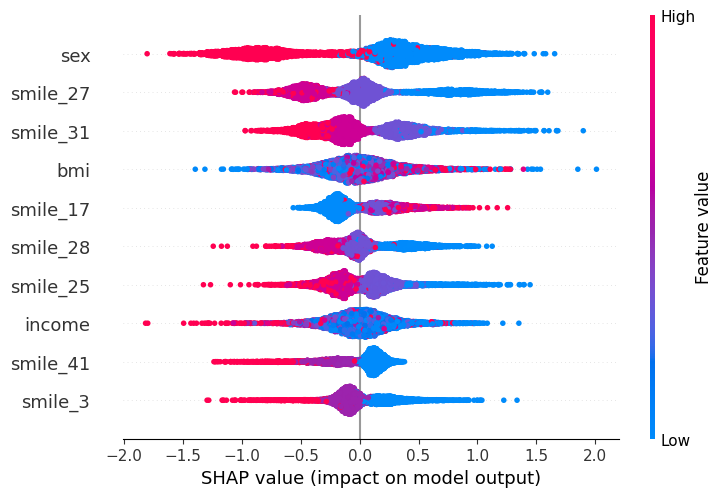

<Figure size 640x480 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

# Build stacked test set in split order (same order used to append SHAP rows)
X_test_all = pd.concat([split['X_test'] for split in splits], axis=0)

# all_shap_values was filled row-by-row in cell 8
sv = np.asarray(all_shap_values)
if sv.ndim != 2:
    raise ValueError(f"Expected 2D SHAP matrix, got shape {sv.shape}")
if sv.shape[0] != X_test_all.shape[0]:
    raise ValueError(
        f"Row mismatch: SHAP rows={sv.shape[0]} vs X_test rows={X_test_all.shape[0]}"
    )

sv_df = pd.DataFrame(sv, columns=X_test_all.columns, index=X_test_all.index)

# Aggregate one-hot encoded features to their original variable names
sv_agg = sv_df.T.groupby(one_hot_agg).sum().T

X_agg = pd.DataFrame(index=X_test_all.index)
for feat in sv_agg.columns:
    cols = [c for c in X_test_all.columns if one_hot_agg(c) == feat]

    if len(cols) == 1:
        X_agg[feat] = X_test_all[cols[0]]
    elif feat in one_hotted:
        X_agg[feat] = X_test_all[cols].to_numpy().argmax(axis=1)
    else:
        X_agg[feat] = X_test_all[cols].mean(axis=1)

expl = shap.Explanation(
    values=sv_agg.values,
    data=X_agg[sv_agg.columns].values,
    feature_names=list(sv_agg.columns),
)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(expl, max_display=10, group_remaining_features=False)
plt.tight_layout()
plt.show()